In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms.functional import to_tensor
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import albumentations as A

In [127]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq = nn.Sequential(
            self._block(1, 32, 3),
            self._block(32, 48, 3, 2),
            self._block(48, 64, 3),
            self._block(64, 80, 3),
            self._block(80, 96, 3, 2),
            self._block(96, 112, 3),
            self._block(112, 128, 3),
            self._block(128, 144, 3, 2),
            self._block(144, 154, 3),
            self._block(154, 116, 3),
            nn.Flatten(),
            nn.Linear(16704, 2, bias=False),
            nn.Sigmoid()
        )

    def _block(self, input_dim, output_dim, kernel_size, stride=1):
        return nn.Sequential(
            nn.Conv2d(input_dim, output_dim, kernel_size, stride, bias=False),
            nn.BatchNorm2d(output_dim),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.seq(x)
        return F.log_softmax(x, dim=1)

In [31]:
tictactoeTransform = A.Compose([
    A.RandomCrop(162, 162, p=0.4),
    A.InvertImg(p=0.18),
    A.ColorJitter(brightness=0.55, contrast=0.6, saturation=0.6, hue=0.6, p=0.4),
    A.GaussNoise(p=0.28),
    A.Blur(blur_limit=4, p=0.22),
    A.GlassBlur(max_delta=1, iterations=1, p=0.14),
    A.CLAHE(p=0.3),
    A.Sharpen(p=0.2),
    A.Emboss(p=0.18),
    A.Equalize(p=0.05),
    A.MultiplicativeNoise(p=0.22),
    A.Resize(168, 168, p=1.0, interpolation=Image.NEAREST),
])

connectfourTransform = A.Compose([
    A.RandomCrop(152, 152, p=0.4),
    A.HorizontalFlip(p=0.5),
    A.ColorJitter(brightness=0.55, contrast=0.6, saturation=0.6, hue=0.6, p=0.4),
    A.GaussNoise(p=0.12),
    A.Blur(blur_limit=4, p=0.22),
    A.GlassBlur(max_delta=1, iterations=1, p=0.14),
    A.CLAHE(p=0.3),
    A.Sharpen(p=0.2),
    A.Emboss(p=0.18),
    A.Equalize(p=0.05),
    A.MultiplicativeNoise(p=0.22),
    A.Resize(168, 168, p=1.0, interpolation=Image.NEAREST),
])

In [128]:
model = Model()
model.load_state_dict(torch.load('/home/robert/Documents/GitHub/OutSmarted/backend/Classification/classificaton.pth'))

<All keys matched successfully>

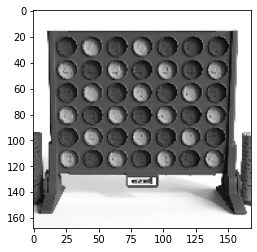

In [138]:
imgPath = '../TicTacToe/data/boards/raw/1.jpg'
imgPath = '../ConnectFour/data/boards/1.jpg'
imgPath = '1.jpg'
img = Image.open(imgPath)
img = img.resize((168, 168))
img = img.convert('L')
img = np.array(img)
# img = connectfourTransform(image=img)['image']
plt.imshow(img, cmap='gray')

In [139]:
torch.exp(model(to_tensor(img).reshape(1, 1, 168, 168)))

tensor([[0.2689, 0.7311]], grad_fn=<ExpBackward0>)